In [0]:
!pip install quandl

  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as py
from matplotlib import style
import datetime
style.use('ggplot')

In [0]:
df = quandl.get("EOD/DIS", authtoken="hnLq2kxzHoKrsNs-Lnr7")
df = df[['Adj_Open',  'Adj_High',  'Adj_Low',  'Adj_Close', 'Adj_Volume']]
df['High_low_pchange'] = (df['Adj_High'] - df['Adj_Low']) / df['Adj_Close'] * 100.0
df['percent_change'] = (df['Adj_Close'] - df['Adj_Open']) / df['Adj_Open'] * 100.0
print(df.head)

<bound method NDFrame.head of               Adj_Open    Adj_High     Adj_Low   Adj_Close   Adj_Volume  \
Date                                                                      
1962-01-02    0.137931    0.142559    0.137931    0.137931    408858.24   
1962-01-03    0.137931    0.140264    0.137931    0.139782    389370.24   
1962-01-04    0.139782    0.140264    0.138857    0.139782    467127.36   
1962-01-05    0.139782    0.140708    0.139338    0.140264    467127.36   
1962-01-08    0.140264    0.142115    0.137005    0.139782    623031.36   
1962-01-09    0.139782    0.142559    0.138857    0.142559    311418.24   
1962-01-10    0.142559    0.144892    0.142559    0.143930    330906.24   
1962-01-11    0.143930    0.149039    0.143485    0.148114    992913.60   
1962-01-12    0.148114    0.148595    0.141634    0.143485    992913.60   
1962-01-15    0.143485    0.144411    0.142559    0.143485    311418.24   
1962-01-16    0.142559    0.142559    0.138857    0.139782    175197.1

In [0]:
df = df[['Adj_Close', 'High_low_pchange', 'percent_change', 'Adj_Volume']]
predict_column = 'Adj_Close'
df.fillna(value = -9999, inplace=True)
predict_number = int(math.ceil(0.001 * len(df)))
df['predict'] = df[predict_column].shift(-predict_number)
print(df.head)

<bound method NDFrame.head of              Adj_Close  High_low_pchange  percent_change   Adj_Volume  \
Date                                                                    
1962-01-02    0.137931          3.355705        0.000000    408858.24   
1962-01-03    0.139782          1.668874        1.342282    389370.24   
1962-01-04    0.139782          1.006623        0.000000    467127.36   
1962-01-05    0.140264          0.976769        0.344371    467127.36   
1962-01-08    0.139782          3.655629       -0.343189    623031.36   
1962-01-09    0.142559          2.597403        1.986755    311418.24   
1962-01-10    0.143930          1.620787        0.961039    330906.24   
1962-01-11    0.148114          3.750000        2.907126    992913.60   
1962-01-12    0.143485          4.851613       -3.125000    992913.60   
1962-01-15    0.143485          1.290323        0.000000    311418.24   
1962-01-16    0.139782          2.649007       -1.948052    175197.12   
1962-01-17    0.13515

In [0]:
X = np.array(df.drop(['predict'], 1))
X_next = X[-predict_number:]
X = X[:-predict_number]
df.dropna(inplace=True)
y = df['predict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lreg = LinearRegression(n_jobs = -1)
lreg.fit(X_train, y_train)
accuracy = lreg.score(X_test, y_test)
predict_set = lreg.predict(X_next)
print(predict_set, accuracy, predict_number)

[107.39194039 104.57159506 100.71520568 106.05271988 106.83688916
 107.68564926 110.04205337 109.37873858 106.73721198 109.95669511
 110.95327835 111.85211293 113.08816653 113.21559331 113.07230532] 0.9969672914520515 15


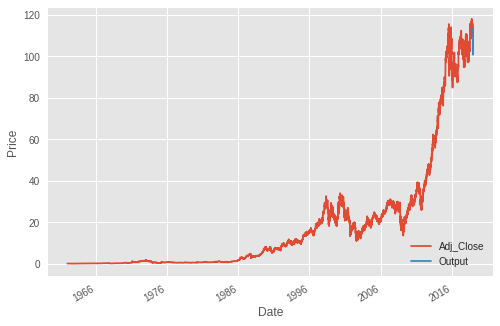

In [0]:
df['Output'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in predict_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj_Close'].plot()
df['Output'].plot()
py.legend(loc=4)
py.xlabel('Date')
py.ylabel('Price')
py.show()